## US Retail Sales Across Industries (1992 - 2019)

### Trend Analysis of US Sales Data Across Several Retail Industries

#### This project investigates model long-term changes with moving averages 

#### Data available at: https://www.kaggle.com/ryanholbrook/exercise-trend/data?select=us-retail-sales.csv

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression

retail1 = pd.read_csv('us-retail-sales.csv')

retail1.columns

Index(['Month', 'Clothing', 'Appliances', 'FoodAndBeverage', 'Automobiles',
       'GeneralMerchandise', 'BuildingMaterials'],
      dtype='object')

In [42]:
retail1.describe()

,Clothing,Appliances,FoodAndBeverage,Automobiles,GeneralMerchandise,BuildingMaterials
count,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000
mean,16414.744048,7569.285714,44668.348214,63576.413690,42382.071429,21938.934524
std,5477.293118,1993.569861,10444.196145,17459.092725,14372.343480,6470.241055
min,6938.000000,3490.000000,28126.000000,26788.000000,14996.000000,8947.000000
25%,12335.500000,6654.750000,35517.000000,51374.750000,30178.500000,16833.750000
50%,15894.500000,7414.000000,42932.500000,62704.000000,44168.000000,21949.500000
75%,19889.750000,8200.250000,52877.000000,74202.500000,53058.250000,26966.750000
max,35157.000000,15458.000000,70028.000000,105884.000000,78716.000000,37940.000000


In [43]:
retail1.dtypes

Month                 object
Clothing               int64
Appliances             int64
FoodAndBeverage        int64
Automobiles            int64
GeneralMerchandise     int64
BuildingMaterials      int64
dtype: object

In [44]:
retail2 = pd.read_csv('us-retail-sales.csv', parse_dates = ['Month'], index_col='Month').to_period('D')

In [45]:
retail2.head()

,Clothing,Appliances,FoodAndBeverage,Automobiles,GeneralMerchandise,BuildingMaterials
Month,,,,,,
1992-01-01,6938,3657,29589,26788,14996,8964
1992-02-01,7524,3490,28570,28203,16015,9023
1992-03-01,8475,3669,29682,31684,17984,10608
1992-04-01,9401,3527,30228,32547,18872,11630
1992-05-01,9558,3571,31677,32883,20037,12327


In [46]:
retail2.dtypes

Clothing              int64
Appliances            int64
FoodAndBeverage       int64
Automobiles           int64
GeneralMerchandise    int64
BuildingMaterials     int64
dtype: object

### Creating plots for each industry

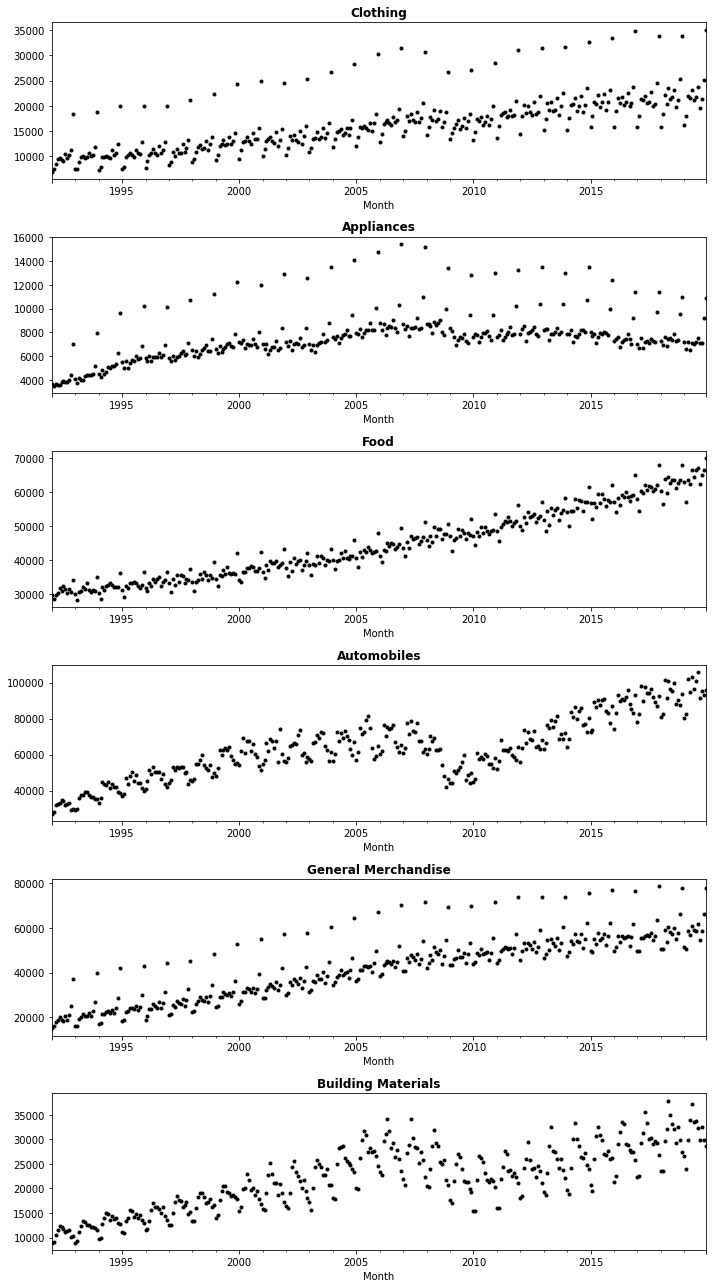

In [47]:
cloth_retail = retail2.loc[:,'Clothing']
appl_retail = retail2.loc[:,'Appliances']
food_retail = retail2.loc[:,'FoodAndBeverage']
auto_retail = retail2.loc[:,'Automobiles']
general_retail = retail2.loc[:,'GeneralMerchandise']
building_retail = retail2.loc[:,'BuildingMaterials']

fig, ax = plt.subplots(6, 1, figsize=(10, 18))
cloth_retail.plot(style='k.', ax=ax[0]).set_title('Clothing', fontweight="bold")
appl_retail.plot(style='k.', ax=ax[1]).set_title('Appliances', fontweight="bold")
food_retail.plot(style='k.', ax=ax[2]).set_title('Food', fontweight="bold")
auto_retail.plot(style='k.', ax=ax[3]).set_title('Automobiles', fontweight="bold")
general_retail.plot(style='k.', ax=ax[4]).set_title('General Merchandise', fontweight="bold")
building_retail.plot(style='k.', ax=ax[5]).set_title('Building Materials', fontweight="bold")

fig.tight_layout()
plt.show()


## Creating moving average graphs for each retail industry

In [48]:
moveav_cloth = cloth_retail.rolling(window=12, center=True, min_periods=6).mean()
moveav_appl = appl_retail.rolling(window=12, center=True, min_periods=6).mean()
moveav_food = food_retail.rolling(window=12, center=True, min_periods=6).mean()
moveav_auto = auto_retail.rolling(window=12, center=True, min_periods=6).mean()
moveav_general = general_retail.rolling(window=12, center=True, min_periods=6).mean()
moveav_building = building_retail.rolling(window=12, center=True, min_periods=6).mean()

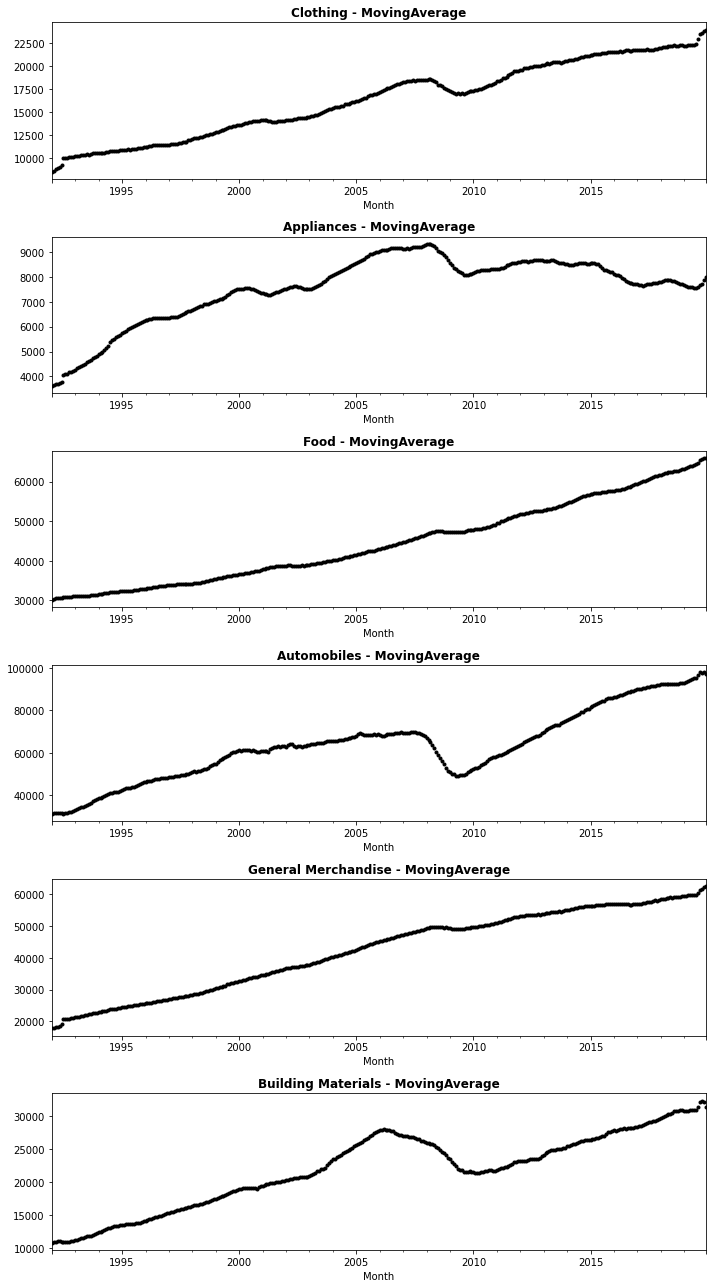

In [49]:
fig, ax = plt.subplots(6, 1, figsize=(10, 18))
moveav_cloth.plot(style='k.', ax=ax[0]).set_title('Clothing - MovingAverage', fontweight="bold")
moveav_appl.plot(style='k.', ax=ax[1]).set_title('Appliances - MovingAverage', fontweight="bold")
moveav_food.plot(style='k.', ax=ax[2]).set_title('Food - MovingAverage', fontweight="bold")
moveav_auto.plot(style='k.', ax=ax[3]).set_title('Automobiles - MovingAverage', fontweight="bold")
moveav_general.plot(style='k.', ax=ax[4]).set_title('General Merchandise - MovingAverage', fontweight="bold")
moveav_building.plot(style='k.', ax=ax[5]).set_title('Building Materials - MovingAverage', fontweight="bold")

fig.tight_layout()
plt.show()


## Creating a Trend Feature for the General Merchandise Industry

### Solution 1: 

In [36]:
from statsmodels.tsa.deterministic import DeterministicProcess

# Creating the target
y_general = general_retail.copy()  

# Instantiating `DeterministicProcess` with arguments
# appropriate for a quadratic trend model

dp = DeterministicProcess(
    index=general_retail.index,      # dates are set as index
    order=2)                         # the time dummy (trend)

# Creating the feature set for dates 
X_general = dp.in_sample()

# Creating features for a 90-day forecast
X_fore_general = dp.out_of_sample(steps=90)


In [37]:
# Checking the feature set for dates
X_general.head()

,trend,trend_squared
Month,,
1992-01-01,1.0,1.0
1992-02-01,2.0,4.0
1992-03-01,3.0,9.0
1992-04-01,4.0,16.0
1992-05-01,5.0,25.0


In [38]:
X_fore_general.head()

,trend,trend_squared
2019-12-02,337.0,113569.0
2019-12-03,338.0,114244.0
2019-12-04,339.0,114921.0
2019-12-05,340.0,115600.0
2019-12-06,341.0,116281.0


In [39]:
# Defining and fitting the model

model = LinearRegression()
model.fit(X_general, y_general)

y_pred = pd.Series(model.predict(X_general), index=X_general.index)
y_fore = pd.Series(model.predict(X_fore_general), index=X_fore_general.index)


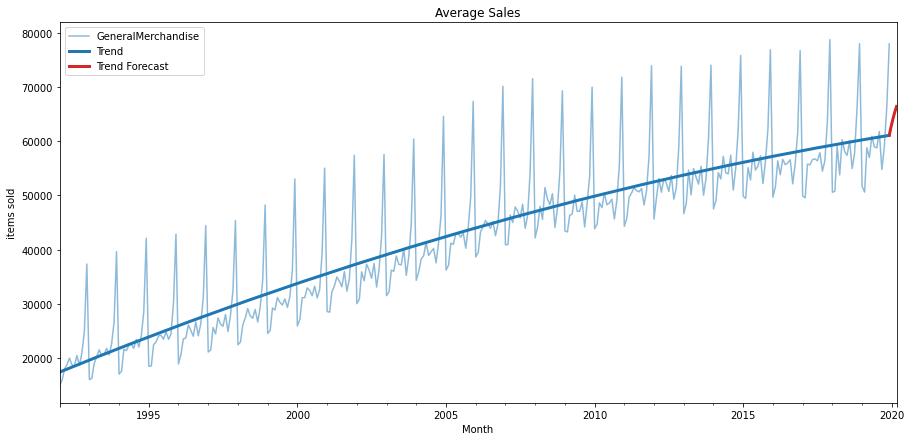

In [40]:
# Creating a plot of the result

ax = y_general.plot(alpha=0.5, title="Average Sales", ylabel="items sold", figsize=(15, 7))
ax = y_pred.plot(ax=ax, linewidth=3, label="Trend", color='C0')
ax = y_fore.plot(ax=ax, linewidth=3, label="Trend Forecast", color='C3')
ax.legend();